In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
from scipy.stats import t

In [53]:
#leemos los datos meteorologicos
df= pd.read_csv("master.csv",engine="python")

In [54]:
df.head()

,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [55]:
df.dtypes

ï»¿country             object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [56]:
df1=df.loc[df['ï»¿country']=='Mexico']

In [57]:
df1=df1.loc[df1['year']==2015]

In [58]:
#df1.groupby(['sex','age']).agg({'suicides_no':'sum'})
df1

,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
16924,Mexico,2015,male,25-34 years,1195,10243158,11.67,Mexico2015,NaN,"1,169,622,672,463",10228,Millenials
16925,Mexico,2015,male,15-24 years,1347,11676480,11.54,Mexico2015,NaN,"1,169,622,672,463",10228,Millenials
16926,Mexico,2015,male,75+ years,163,1427654,11.42,Mexico2015,NaN,"1,169,622,672,463",10228,Silent
16927,Mexico,2015,male,35-54 years,1560,15181008,10.28,Mexico2015,NaN,"1,169,622,672,463",10228,Generation X
16928,Mexico,2015,male,55-74 years,584,6465941,9.03,Mexico2015,NaN,"1,169,622,672,463",10228,Boomers
16929,Mexico,2015,female,15-24 years,484,11354811,4.26,Mexico2015,NaN,"1,169,622,672,463",10228,Millenials
16930,Mexico,2015,female,25-34 years,267,10079012,2.65,Mexico2015,NaN,"1,169,622,672,463",10228,Millenials
16931,Mexico,2015,female,35-54 years,303,15940497,1.90,Mexico2015,NaN,"1,169,622,672,463",10228,Generation X
16932,Mexico,2015,female,55-74 years,88,7021916,1.25,Mexico2015,NaN,"1,169,622,672,463",10228,Boomers
16933,Mexico,2015,male,5-14 years,137,11790898,1.16,Mexico2015,NaN,"1,169,622,672,463",10228,Generation Z


In [59]:
df3=df1.suicides_no.groupby([df1.sex, df1.age]).sum().unstack().fillna(0).astype(int)

In [60]:
df3

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
sex,,,,,,
female,484,267,303,95,88,11
male,1347,1195,1560,137,584,163


In [61]:
import scipy.stats

In [62]:
vieja=[484,267,303,95,88,11]

In [63]:
vieja

[484, 267, 303, 95, 88, 11]

In [64]:
vato=[1347,1195,1560,137,584,163]

In [65]:
vato

[1347, 1195, 1560, 137, 584, 163]

In [66]:
house = [ vieja , vato ]
chi2, p, ddof, expected = scipy.stats.chi2_contingency( house )
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 170.25310062001859
p-value: 6.443178859832743e-35
Degrees of Freedom: 5

[[ 366.55245428  292.68142445  372.95861405   46.44465833  134.52935515
    34.83349374]
 [1464.44754572 1169.31857555 1490.04138595  185.55534167  537.47064485
   139.16650626]]


In [67]:
expected

array([[ 366.55245428,  292.68142445,  372.95861405,   46.44465833,
         134.52935515,   34.83349374],
       [1464.44754572, 1169.31857555, 1490.04138595,  185.55534167,
         537.47064485,  139.16650626]])

In [83]:
df3=df1.suicides_no.groupby([df1.sex, df1.generation]).sum().unstack().fillna(0).astype(int)

In [84]:
df3

generation,Boomers,Generation X,Generation Z,Millenials,Silent
sex,,,,,
female,88,303,95,751,11
male,584,1560,137,2542,163


In [85]:
vieja=[88,303,95,751,11]

In [86]:
vato=[584,1560,137,2542,163]

In [87]:
house = [ vieja , vato ]
chi2, p, ddof, expected = scipy.stats.chi2_contingency( house )
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 136.35620190426334
p-value: 1.7005742769908065e-28
Degrees of Freedom: 4

[[ 134.52935515  372.95861405   46.44465833  659.23387873   34.83349374]
 [ 537.47064485 1490.04138595  185.55534167 2633.76612127  139.16650626]]


In [68]:
df2=df1[df1['sex']=='male']
df2['no_suicidio']=df2['population']-df2['suicides_no']
df2

,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
16924,Mexico,2015,male,25-34 years,1195,10243158,11.67,Mexico2015,NaN,"1,169,622,672,463",10228,Millenials
16925,Mexico,2015,male,15-24 years,1347,11676480,11.54,Mexico2015,NaN,"1,169,622,672,463",10228,Millenials
16926,Mexico,2015,male,75+ years,163,1427654,11.42,Mexico2015,NaN,"1,169,622,672,463",10228,Silent
16927,Mexico,2015,male,35-54 years,1560,15181008,10.28,Mexico2015,NaN,"1,169,622,672,463",10228,Generation X
16928,Mexico,2015,male,55-74 years,584,6465941,9.03,Mexico2015,NaN,"1,169,622,672,463",10228,Boomers
16933,Mexico,2015,male,5-14 years,137,11790898,1.16,Mexico2015,NaN,"1,169,622,672,463",10228,Generation Z


In [88]:
from scipy import stats
f,p=stats.f_oneway(df2.suicides_no,df2.no_suicidio)
print('f', f, 'p', p)

f 22.929073235919947 p 0.0007363279363636825


In [97]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

df2_lm=ols('suicides_no ~ generation ', data=df2).fit() #Specify C for Categorical
print(sm.stats.anova_lm(df2_lm, typ=2))

               sum_sq   df          F    PR(>F)
generation  1907510.0  4.0  41.280947  0.116146
Residual      11552.0  1.0        NaN       NaN


In [91]:
df4=df1[df1['sex']=='female']
df4['no_suicidio']=df4['population']-df4['suicides_no']
df4

C:\Users\JESUS MEDINA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,no_suicidio
16929,Mexico,2015,female,15-24 years,484,11354811,4.26,Mexico2015,NaN,"1,169,622,672,463",10228,Millenials,11354327
16930,Mexico,2015,female,25-34 years,267,10079012,2.65,Mexico2015,NaN,"1,169,622,672,463",10228,Millenials,10078745
16931,Mexico,2015,female,35-54 years,303,15940497,1.90,Mexico2015,NaN,"1,169,622,672,463",10228,Generation X,15940194
16932,Mexico,2015,female,55-74 years,88,7021916,1.25,Mexico2015,NaN,"1,169,622,672,463",10228,Boomers,7021828
16934,Mexico,2015,female,5-14 years,95,11261292,0.84,Mexico2015,NaN,"1,169,622,672,463",10228,Generation Z,11261197
16935,Mexico,2015,female,75+ years,11,1915217,0.57,Mexico2015,NaN,"1,169,622,672,463",10228,Silent,1915206


In [92]:
from scipy import stats
f,p=stats.f_oneway(df4.suicides_no,df4.no_suicidio)
print('f', f, 'p', p)

f 24.667402222797694 p 0.0005644695777083094


In [96]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

df4_lm=ols('suicides_no ~ generation ', data=df4).fit() #Specify C for Categorical
print(sm.stats.anova_lm(df4_lm, typ=2))

              sum_sq   df         F    PR(>F)
generation  131115.5  4.0  1.392209  0.555559
Residual     23544.5  1.0       NaN       NaN


In [75]:
d4=df.loc[df['ï»¿country']=='Mexico']

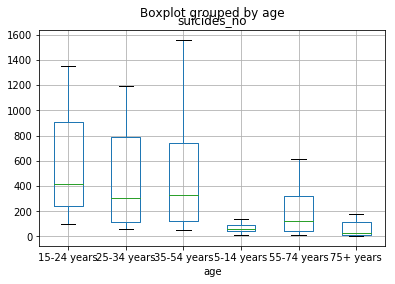

In [76]:
d4.boxplot('suicides_no', by='age')
#se hace una grafica de barras de mexico, para todos los años
#para hombres y para mujeres 

In [77]:
d5 = d4.loc[d4['sex']=='female']

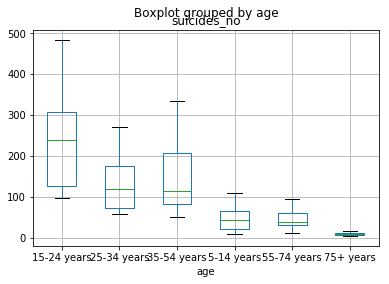

In [78]:
d5.boxplot('suicides_no',by='age')
#sucidios por edades, de las mujeres en mexico, desde 1985 hasta el 2015

In [79]:
d6=d4.loc[d4['sex']=='male']

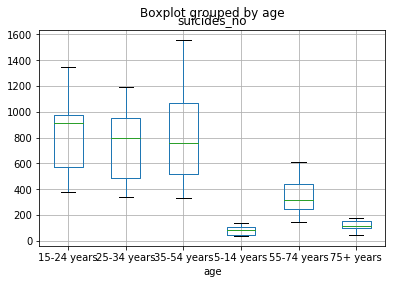

In [80]:
d6.boxplot('suicides_no',by='age')
#suicidios por edad, de hombres en mexico, desde 1985 hasta el 2015

In [82]:
d4.head()


,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
16564,Mexico,1985,male,75+ years,44,432000,10.19,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation
16565,Mexico,1985,male,55-74 years,145,2330000,6.22,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation
16566,Mexico,1985,male,25-34 years,340,5679000,5.99,Mexico1985,0.634,"184,472,557,415",2730,Boomers
16567,Mexico,1985,male,35-54 years,327,5836000,5.60,Mexico1985,0.634,"184,472,557,415",2730,Silent
16568,Mexico,1985,male,15-24 years,375,8420000,4.45,Mexico1985,0.634,"184,472,557,415",2730,Generation X
